# Random policy

This the most basic player strategy - choose actions at random. A random policy ($\Pi_{R}$) has following flow:
1. at random (with $p=1/2$) draw card from discard or deck pile
2. choose card from board at random and replace it with newly drawn card
3. repeat till all cards are turned or someone else ended the game

## Modfication
There are many small _tweaks_ to the random policy:
 - change $p$ (probability of choosing a card from discard pile)
 - choose known over unknown card from the board, $q=\frac{\#\ known\ cards}{\#\ uknown\ cards}$ (probability of choosing a known card)

In [1]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt 

from skyjo.environment import PlayersBoard, Deck, DiscardPile, EXPECTED_VALUE
from skyjo.policies.random_policy import RandomPolicy

In [2]:
def game() -> float:
    deck = Deck()
    discard_pile = DiscardPile()
    
    discard_pile.discard(deck.draw())
    board = PlayersBoard([deck.draw() for _ in range(12)])
    
    policy = RandomPolicy(board, deck, discard_pile)
    round = 0
    while not board.is_finished():
        card, position = policy.turn()
        discard_pile.discard(deck.draw())
        round += 1

    return board.value()

In [29]:
n = 10 ** 4
x = np.array([game() for _ in range(n)])
avg_scores = np.cumsum(x) / np.arange(1, n + 1)

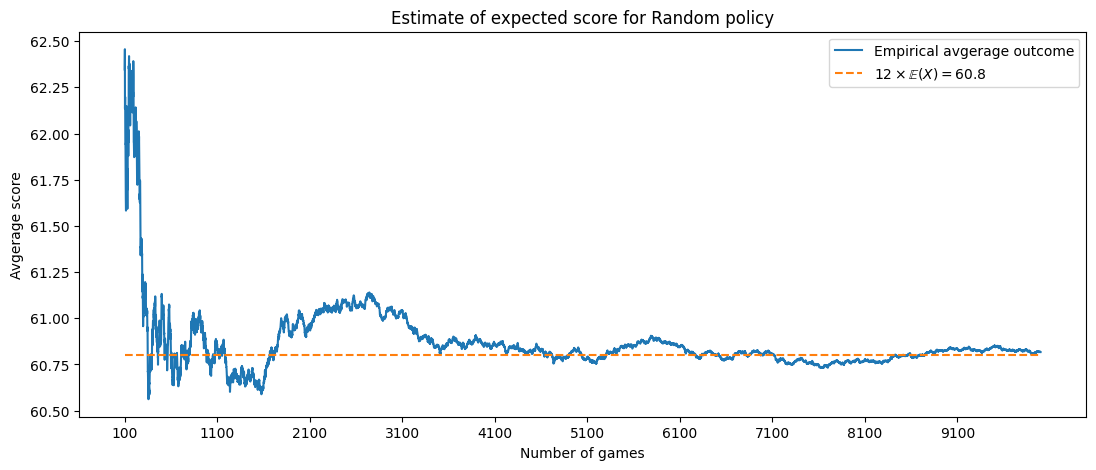

In [30]:
plt.figure(figsize=(13, 5))
plt.title("Estimate of expected score for Random policy")
plt.xlabel("Number of games")
plt.ylabel("Avgerage score")
plt.xticks(np.arange(100, n + 100, step=n / 10))
plt.plot(np.arange(100, n), avg_scores[100:], label="Empirical avgerage outcome")
# plt.hist(x, orientation="horizontal", bins=15)
plt.plot([100, n], [EXPECTED_VALUE * 12, EXPECTED_VALUE * 12], "--", label=r"$12 \times \mathbb{E}(X)=60.8$")
plt.legend()
plt.show()